<a href="https://colab.research.google.com/github/yoonju977/Digital-Image-Processing/blob/main/CCA_task1_%EC%B5%9C%EC%A2%85%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E'

Mounted at /content/drive


Processing Image 1...


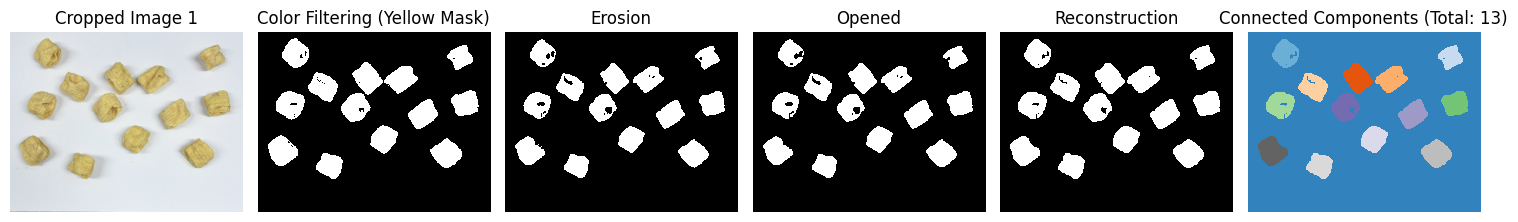

Processing Image 2...


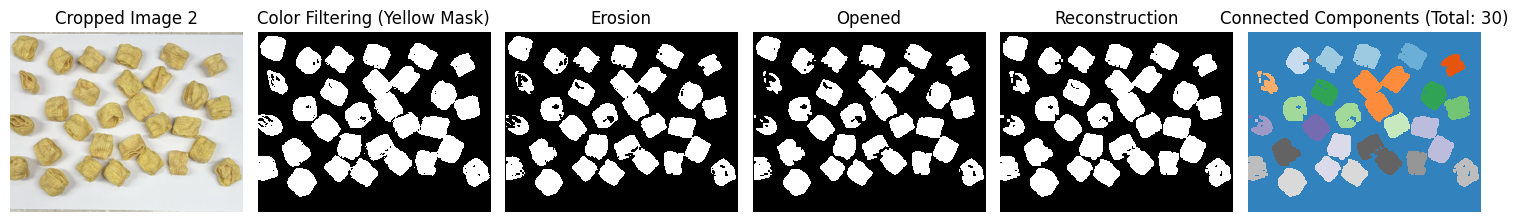

Processing Image 3...


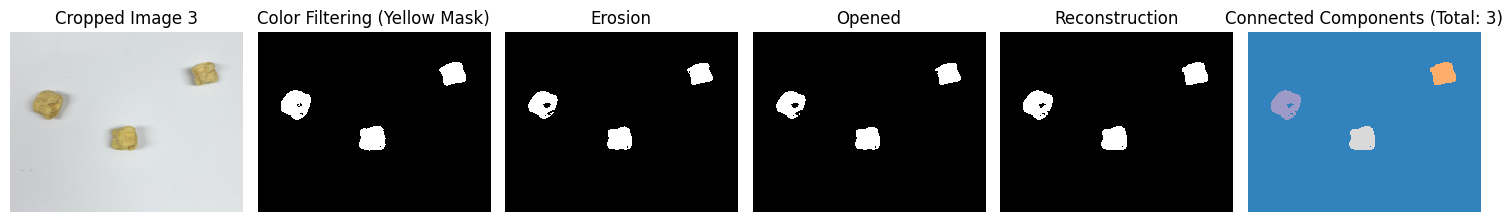

Processing Image 4...


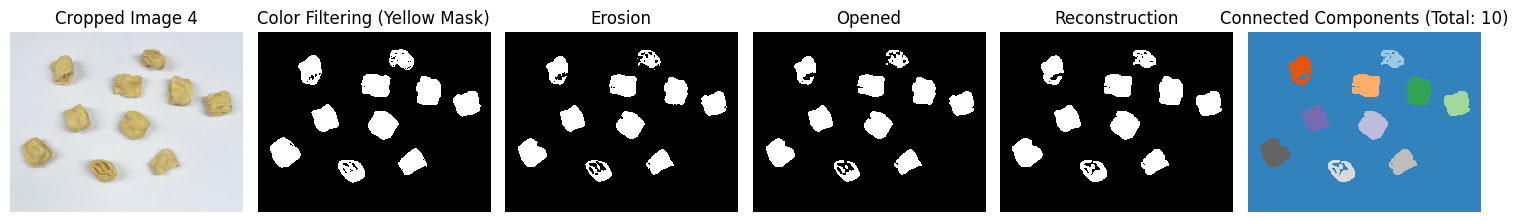

Processing Image 5...


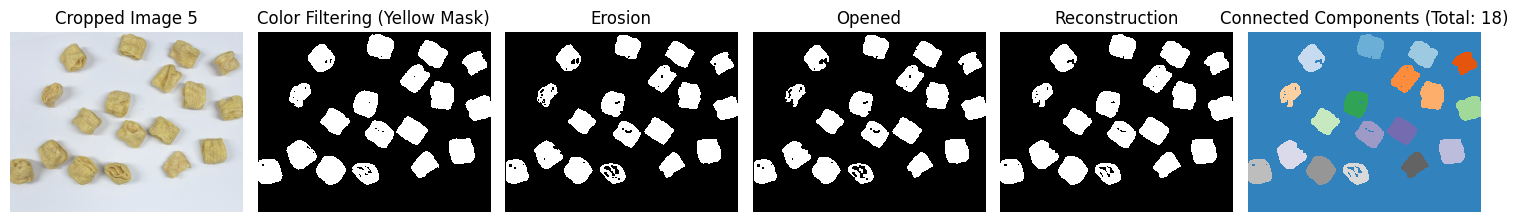

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Preprocess the image
def preprocessing_with_color_filter(img):
    results = []

    # Convert to HSV and apply color filter
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_img, (20, 50, 50), (40, 255, 255))  # 노란색 범위
    results.append(("Color Filtering (Yellow Mask)", mask, "gray"))

    # Erosion 적용
    se = np.ones((6, 6))
    eroded_img = nd.binary_erosion(mask, structure=se).astype(np.uint8)
    results.append(("Erosion", eroded_img, "gray"))

    # Opening 적용
    se = np.ones((6, 6))
    opened_img = nd.binary_opening(eroded_img, structure=se).astype(np.uint8)
    results.append(("Opened", opened_img, "gray"))

    #Opening 후 Morphological Reconstruction으로 복구
    kernel = np.ones((5, 5), np.uint8)
    marker = opened_img
    reconstructed_img = cv2.morphologyEx(marker, cv2.MORPH_DILATE, kernel)
    results.append(("Reconstruction", reconstructed_img, "gray"))


    # Connected Component Analysis
    labeled_img, num_components = connected_component(reconstructed_img)
    results.append((f"Connected Components (Total: {num_components})", labeled_img, "tab20c"))

    return results

# Segmentation (connected components)
def connected_component(binary_img, min_size=50):
    labeled_img, num_features = nd.label(binary_img)

    # Component filtering
    component_sizes = np.bincount(labeled_img.ravel())
    for i, size in enumerate(component_sizes):
        if size < min_size:
            labeled_img[labeled_img == i] = 0

    labeled_img, num_features = nd.label(labeled_img > 0)
    return labeled_img, num_features

# Main execution
if __name__ == "__main__":
    image_paths = [
        "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task1_01.jpeg",
        "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task1_02.jpeg",
        "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task01_03.jpeg",
        "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task01_04.jpeg",
        "/content/drive/MyDrive/HUFS/24-2의료영상처리학/DIP1/DIP4E/task01_05.jpeg",
    ]
    common_crop_coords = (18, 148, 1020, 924)

    for idx, image_path in enumerate(image_paths):
        print(f"Processing Image {idx + 1}...")

        # Load the image
        img = cv2.imread(image_path)

        # Crop the image using the common coordinates
        x1, y1, x2, y2 = common_crop_coords
        cropped_img = img[y1:y2, x1:x2]

        # Preprocess the image using color filter
        results = preprocessing_with_color_filter(cropped_img)

        # Plot all results
        fig, axes = plt.subplots(1, len(results) + 1, figsize=(15, 5))
        axes[0].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        axes[0].set_title(f"Cropped Image {idx + 1}")
        axes[0].axis("off")

        for i, (title, result, cmap) in enumerate(results):
            axes[i + 1].imshow(result, cmap=cmap, interpolation="nearest")
            axes[i + 1].set_title(title)
            axes[i + 1].axis("off")

        plt.tight_layout()
        plt.show()